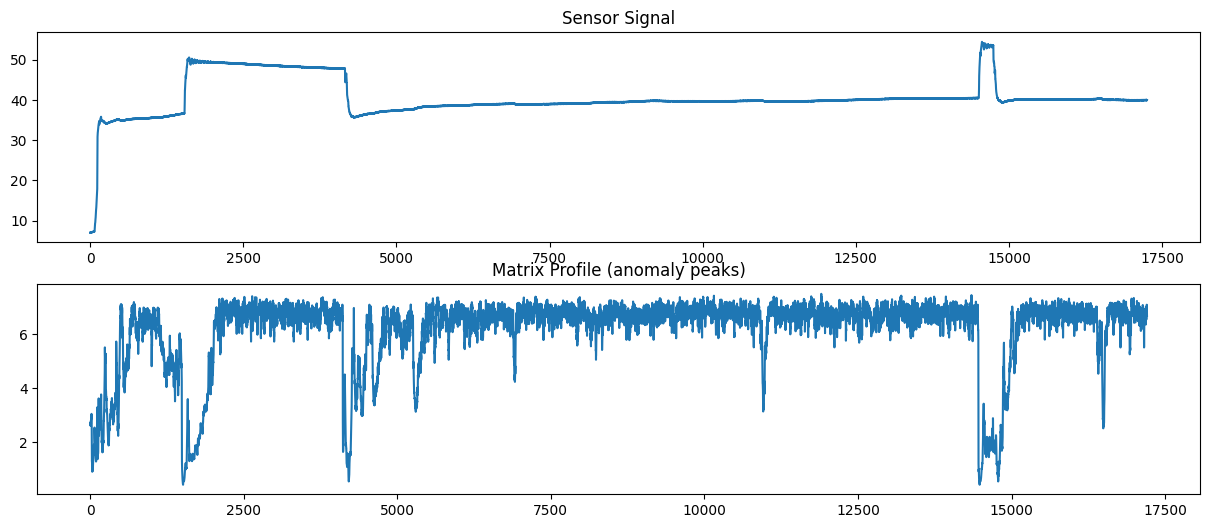

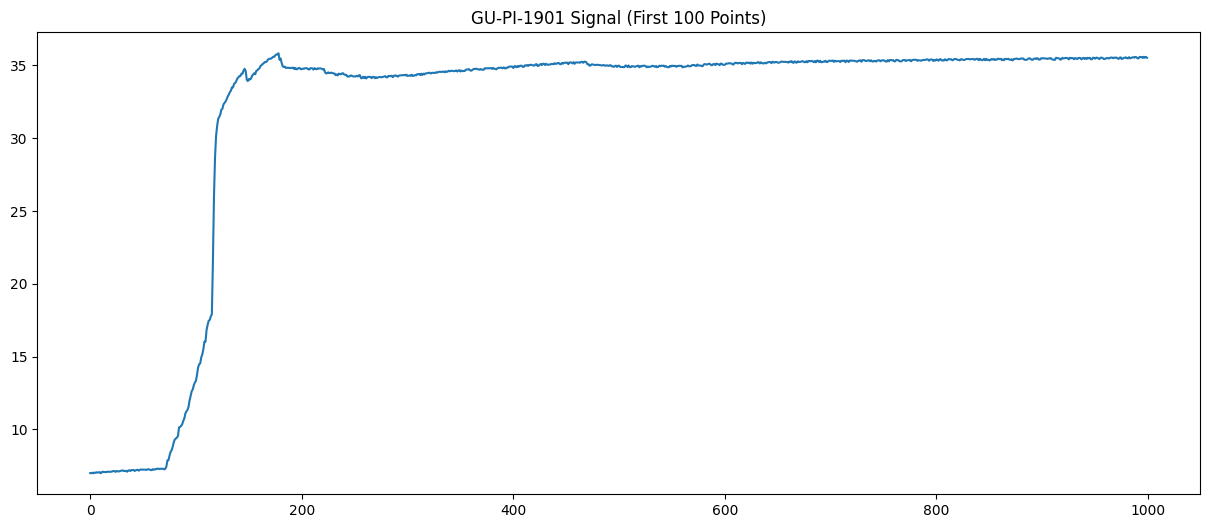

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import stumpy

# Load your data (example: sensor column)
df = pd.read_csv(r'G:\GlitchDetect\data\real_time_MKPL\202505161524GMT+5x30.h24.csv')

# Choose one sensor column
signal = df["GU-PI-1901"].dropna().values

# Window size: how many points define a "pattern" (tune this)
m = 50  

# Compute Matrix Profile
mp = stumpy.stump(signal, m)

# mp[:,0] is the matrix profile (distance), mp[:,1] is the index of nearest neighbor
matrix_profile = mp[:, 0]

# Plot signal & matrix profile
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(signal)
plt.title("Sensor Signal")

plt.subplot(2,1,2)
plt.plot(matrix_profile)
plt.title("Matrix Profile (anomaly peaks)")
plt.show()


plt.figure(figsize=(15,6))
plt.plot(df['GU-PI-1901'][:1000])
plt.title("GU-PI-1901 Signal (First 100 Points)")
plt.show()


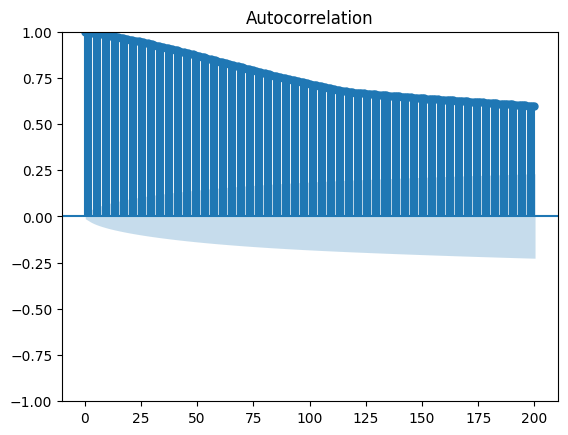

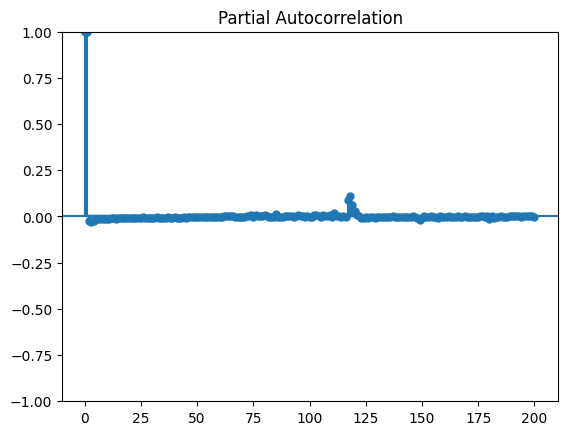

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(signal, lags=200)
plt.show()

plot_pacf(signal, lags=200)
plt.show()


1725


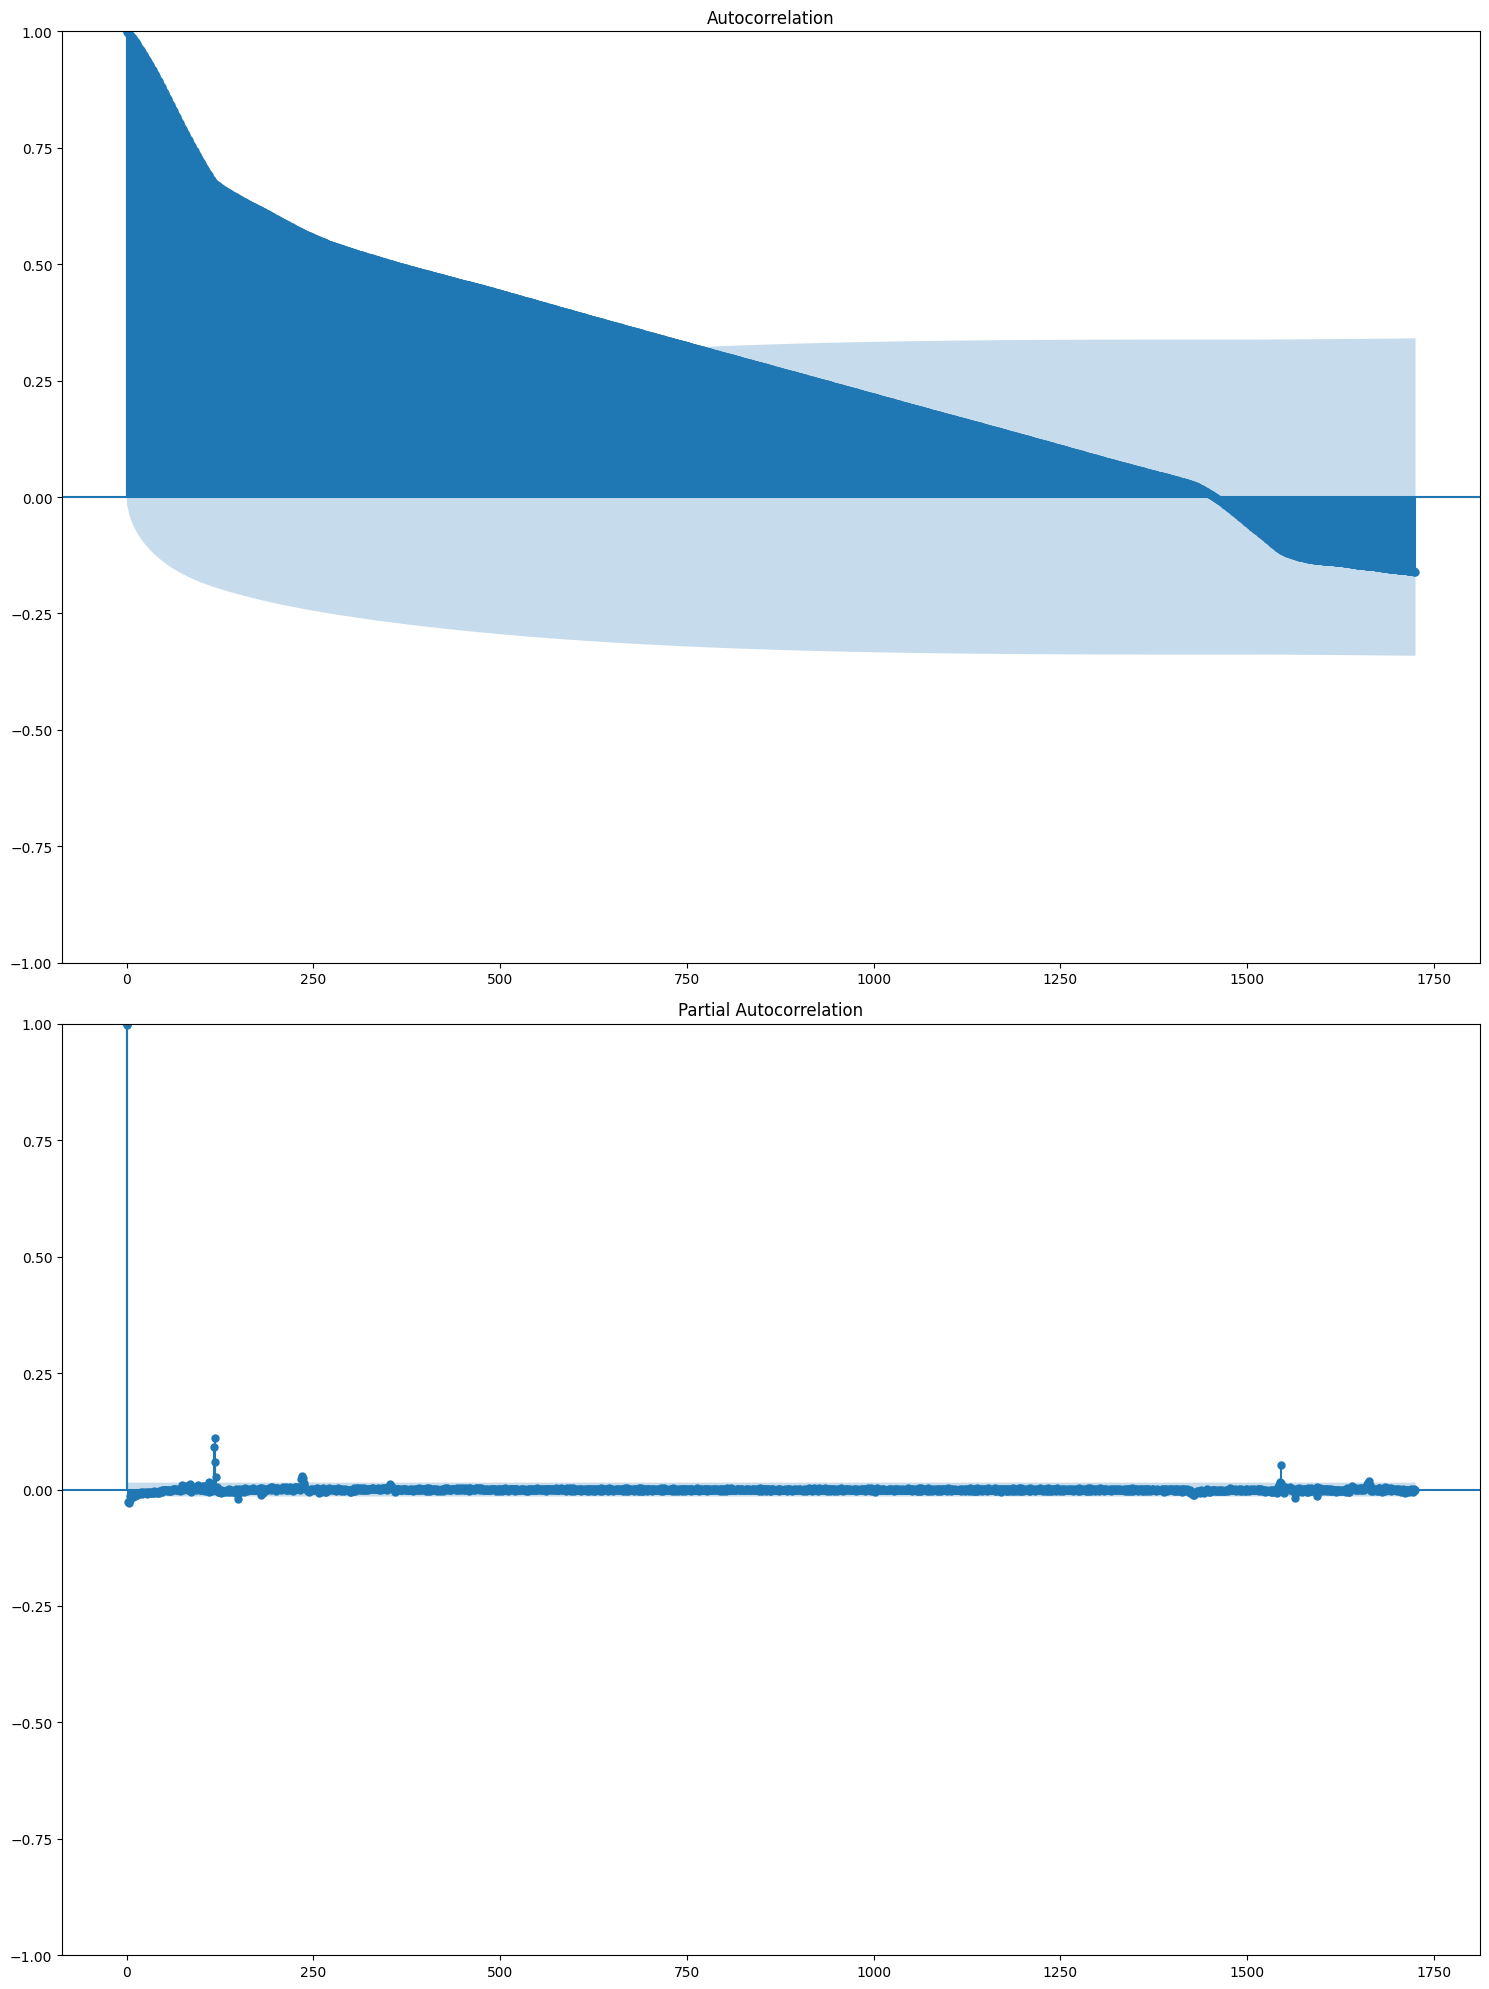

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2, 1, figsize=(15,20))

print(len(signal)//10)

plot_acf(signal, lags=len(signal)//10, ax=axes[0])
plot_pacf(signal, lags=len(signal)//10, ax=axes[1])

plt.tight_layout()


In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(signal)
print('ADF Statistic:', result[0])
print(f'p-value: {result[1]:.20f}')
if result[1] < 0.05:
    print("Stationary → still temporal dependence")
else:
    print("Non-stationary → strong temporal trend/seasonality")


ADF Statistic: -7.674408446626621
p-value: 0.00000000001562620927
Stationary → still temporal dependence


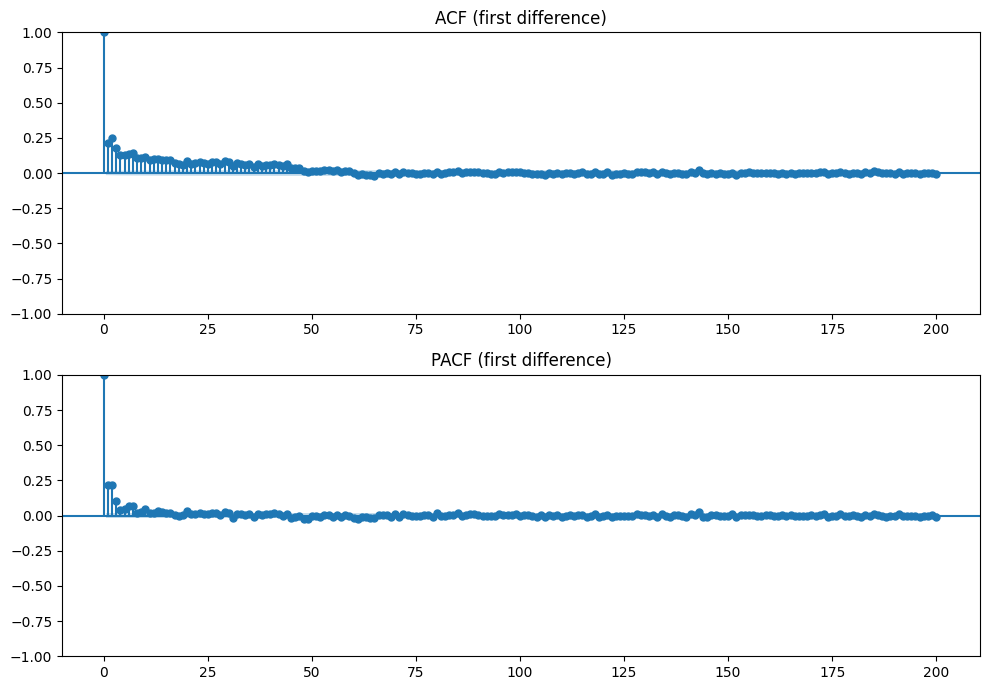

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# y should be a pandas Series indexed by time, e.g. your pressure signal
y = df['GU-PI-1901'].astype(float)  # ensure numeric

# 1) First difference to remove persistence/trend
y_diff = y.diff().dropna()

# 2) (Optional) Seasonal difference if a period s exists, e.g., s=120 for 10-minute cycle at 5s sampling
# s = 120
# y_seasdiff = y.diff(s).dropna()

# 3) Plot ACF/PACF of the differenced series
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
plot_acf(y_diff, lags=200, ax=axes[0])        # choose lags relevant to your sampling
plot_pacf(y_diff, lags=200, method="ywmle", ax=axes[1])  # or method="ols"
axes[0].set_title("ACF (first difference)")
axes[1].set_title("PACF (first difference)")
plt.tight_layout()
plt.show()


c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



AR(1)  order=(1, 0, 0)
AIC=-33319.792  BIC=-33296.524
Ljung–Box p-values: lag10=0, lag20=0, lag40=0
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      1.986      0.047    2.55e-05       0.004
ar.L1          0.2156      0.001    300.336      0.000       0.214       0.217
sigma2         0.0085   8.37e-06   1013.456      0.000       0.008       0.009


c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



AR(2)  order=(2, 0, 0)
AIC=-34134.753  BIC=-34103.730
Ljung–Box p-values: lag10=1.05e-84, lag20=3.21e-124, lag40=9.28e-170
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      1.606      0.108      -0.000       0.004
ar.L1          0.1693      0.001    215.900      0.000       0.168       0.171
ar.L2          0.2151      0.002    135.276      0.000       0.212       0.218
sigma2         0.0081   7.94e-06   1019.445      0.000       0.008       0.008

Selected by BIC: AR(2)


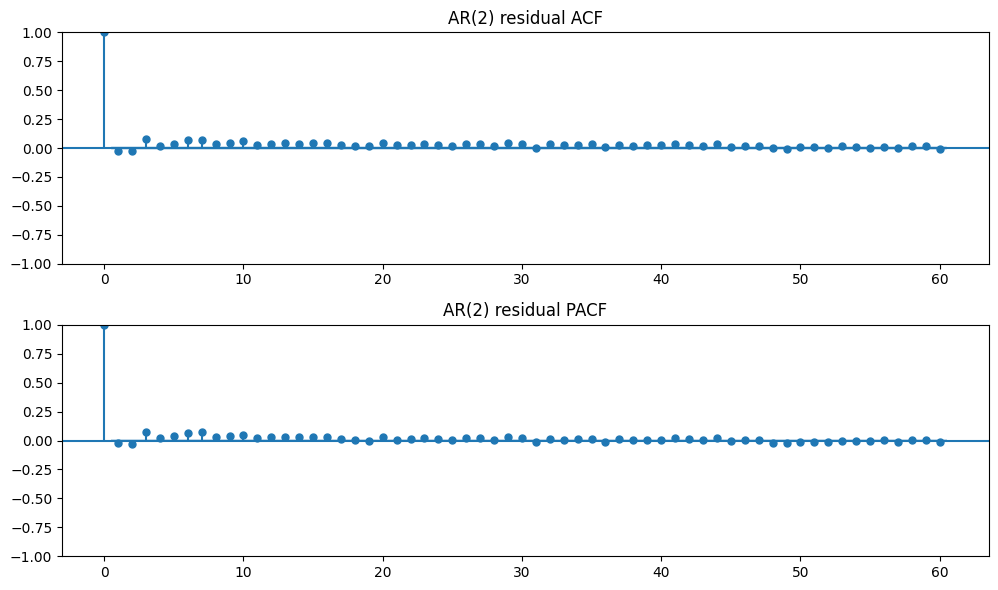


Forecast (levels) head:
17255    40.003942
17256    40.018231
17257    40.024825
17258    40.030191
17259    40.033694
Name: predicted_mean, dtype: float64

Forecast 95% CI (levels) head:
           lower      upper
17255  39.827616  40.180268
17256  39.663071  40.373392
17257  39.485740  40.563911
17258  39.306672  40.753711
17259  39.125379  40.942010


c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# --- 0) Input series ---
# signal should be a 1-D array-like or a pandas Series
y = pd.Series(signal).astype(float)

# --- 1) Make series stationary if needed ---
# If prior fits showed AR ~ 1 or ACF tails slowly, difference once.
# Set use_diff = True to difference; otherwise keep as-is.
use_diff = True
if use_diff:
    y_model = y.diff().dropna()
    d = 1   # we will tell ARIMA d=0 because we already differenced manually
else:
    y_model = y.copy()
    d = 0

# --- 2) Helper: fit model and summarize diagnostics ---
def fit_and_report(name, order, series):
    mod = ARIMA(series, order=order)  # order=(p,0,q) since we pre-differenced if needed
    res = mod.fit()
    # Ljung–Box p-value at multiple lags
    lb = acorr_ljungbox(res.resid, lags=[10, 20, 40], return_df=True)["lb_pvalue"]
    p10, p20, p40 = float(lb.iloc[0]), float(lb.iloc[1]), float(lb.iloc[2])
    print(f"\n{name}  order={order}")
    print(f"AIC={res.aic:.3f}  BIC={res.bic:.3f}")
    print(f"Ljung–Box p-values: lag10={p10:.3g}, lag20={p20:.3g}, lag40={p40:.3g}")
    print(res.summary().tables[1])  # coefficient table
    return res

# --- 3) Fit AR(1) and AR(2) (i.e., ARIMA(p,0,0) on the modeling series) ---
ar1 = fit_and_report("AR(1)", (1, 0, 0), y_model)
ar2 = fit_and_report("AR(2)", (2, 0, 0), y_model)

# --- 4) Pick the better one by BIC (or AIC) and plot residual diagnostics ---
best = min([(ar1, "AR(1)"), (ar2, "AR(2)")], key=lambda x: x[0].bic)
best_res, best_name = best
print(f"\nSelected by BIC: {best_name}")

fig, axes = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(best_res.resid, lags=60, ax=axes[0])
axes[0].set_title(f"{best_name} residual ACF")
plot_pacf(best_res.resid, lags=60, method="ywmle", ax=axes[1])
axes[1].set_title(f"{best_name} residual PACF")
plt.tight_layout(); plt.show()

# --- 5) Forecast on the same scale as y ---
# If we differenced, integrate the forecasts back by cumulative sum.
steps = 60  # e.g., next 5 minutes at 5-second sampling
fc = best_res.get_forecast(steps=steps)
mean_diff = fc.predicted_mean
ci_diff = fc.conf_int()

if use_diff:
    # Reconstruct level forecasts by adding to the last observed level
    last_level = y.iloc[-1]
    mean_level = last_level + mean_diff.cumsum()
    ci_level = pd.DataFrame({
        "lower": last_level + ci_diff.iloc[:, 0].cumsum(),
        "upper": last_level + ci_diff.iloc[:, 1].cumsum()
    })
    print("\nForecast (levels) head:")
    print(mean_level.head())
    print("\nForecast 95% CI (levels) head:")
    print(ci_level.head())
else:
    print("\nForecast (levels) head:")
    print(mean_diff.head())
    print("\nForecast 95% CI (levels) head:")
    print(ci_diff.head())


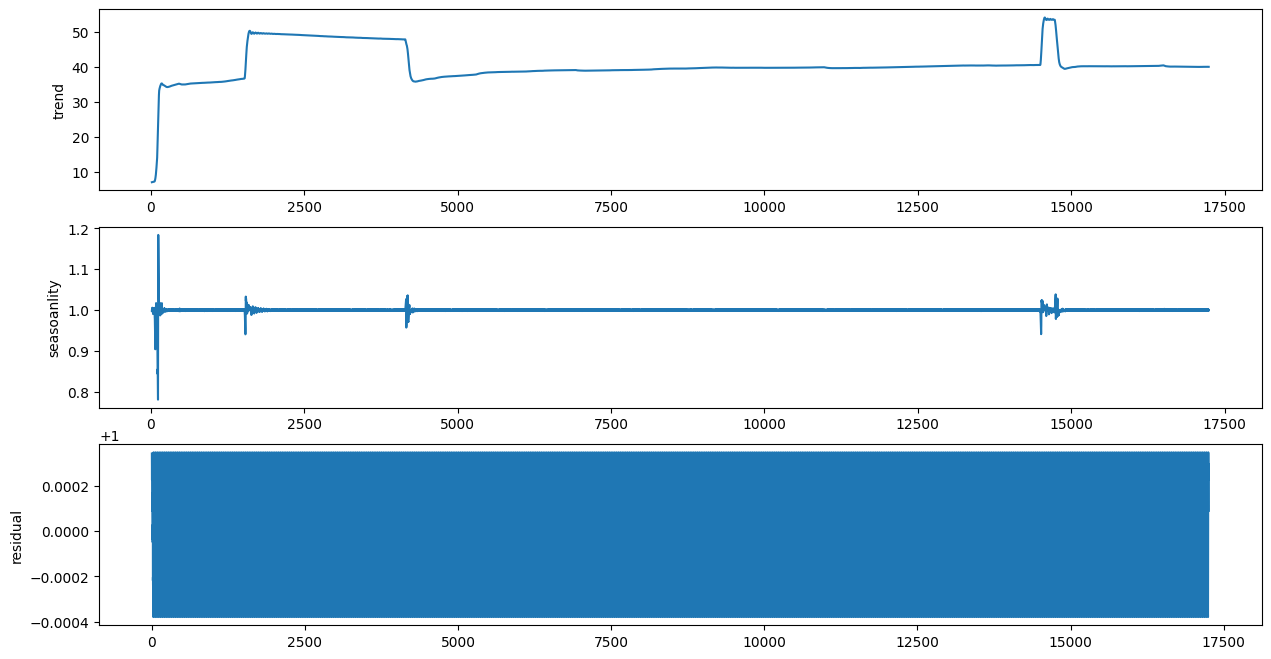

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(df['GU-PI-1901'], model = "multiplicative",period = 30)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasoanlity")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()

In [16]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

y = signal  # pandas Series indexed by time
# Example: start simple with ARIMA(1,0,1) if ADF says stationary; use d=1 if not.
model = ARIMA(y, order=(1,0,1))
res = model.fit()
print(res.summary())

# Residual diagnostics
lb = acorr_ljungbox(res.resid, lags=[13], return_df=True)
print(lb)

# Forecast
fc = res.get_forecast(steps=60)
pred = fc.predicted_mean
ci = fc.conf_int()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                17256
Model:                 ARIMA(1, 0, 1)   Log Likelihood               16531.489
Date:                Thu, 28 Aug 2025   AIC                         -33054.978
Time:                        14:42:36   BIC                         -33023.955
Sample:                             0   HQIC                        -33044.755
                              - 17256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1036     30.865      0.457      0.648     -46.390      74.597
ar.L1          1.0000   5.74e-05   1.74e+04      0.000       1.000       1.000
ma.L1          0.1546      0.001    203.010      0.0